In [1]:
!pip install scikit-fuzzy #Instalación de librería.

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 11.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894079 sha256=0db7ae1a4facdde6ba0c13f1799eb736216f47efbbfd7fd62b564844dc92f68c
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


# Desarrollo taller 1 Profundización Automatización y Control
Por: Juan José Torres Quiñonez.
Cógigo: 220160099.

# 1. Digitalización del punto 1 como VERIFICACIÓN del correcto funcionamiento del control.

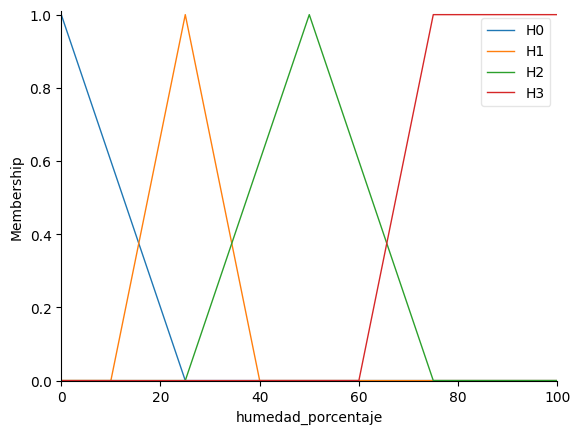

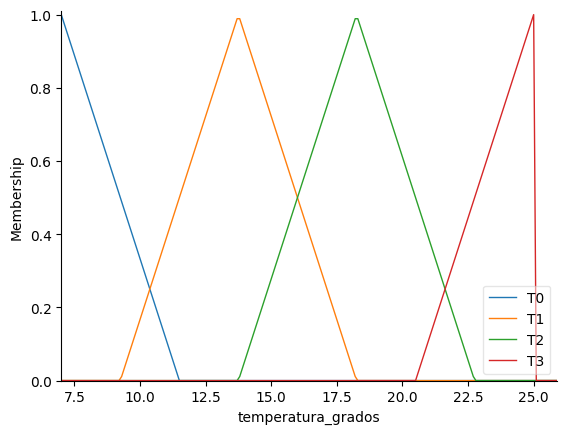

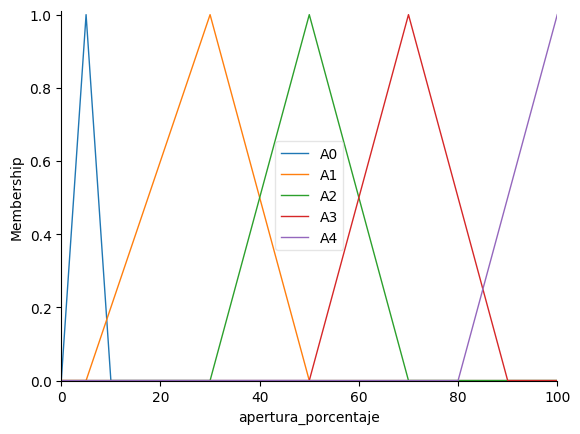

In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
rango_desde=0; rango_hasta=101 #es 10+1 por programación.
#VARIABLES ENTRADA:
humedad_porcentaje = ctrl.Antecedent(np.arange(rango_desde,rango_hasta,1),'humedad_porcentaje') #Antecedent significa que es una variable de entrada.
temperatura_grados= ctrl.Antecedent(np.arange(7,26,0.1),'temperatura_grados')
#VARIABLES SALIDA:
apertura_porcentaje=ctrl.Consequent(np.arange(0,101,1),'apertura_porcentaje')
##Funciones de membresía:
#calidad comida
humedad_porcentaje['H0']=fuzz.trimf(humedad_porcentaje.universe,[0,0,25]) #Define como triangulos con puntos [a,b,c]. Se puede trapecio trapmf[a,b,c,d]
humedad_porcentaje['H1']=fuzz.trimf(humedad_porcentaje.universe,[10,25,40])
humedad_porcentaje['H2']=fuzz.trimf(humedad_porcentaje.universe,[25,50,75])
humedad_porcentaje['H3']=fuzz.trapmf(humedad_porcentaje.universe,[60,75,100,100])
humedad_porcentaje.view() #Grafica

#tiempo atención - rapido normal - lento
temperatura_grados['T0']=fuzz.trimf(temperatura_grados.universe,[7,7,11.5])
temperatura_grados['T1']=fuzz.trimf(temperatura_grados.universe,[9.25,13.75,18.25])
temperatura_grados['T2']=fuzz.trimf(temperatura_grados.universe,[13.75,18.25,22.75])
temperatura_grados['T3']=fuzz.trimf(temperatura_grados.universe,[20.5,25,25])
temperatura_grados.view()

#apertura_porcentaje
apertura_porcentaje['A0']=fuzz.trimf(apertura_porcentaje.universe,[0,5,10])# triángulo o trapecio, trapmf[a,b,c,d]
apertura_porcentaje['A1']=fuzz.trimf(apertura_porcentaje.universe,[5,30,50])# 8,30,50 ******************************************
apertura_porcentaje['A2']=fuzz.trimf(apertura_porcentaje.universe,[30,50,70])
apertura_porcentaje['A3']=fuzz.trimf(apertura_porcentaje.universe,[50,70,90])
apertura_porcentaje['A4']=fuzz.trimf(apertura_porcentaje.universe,[80,100,100])
apertura_porcentaje.view()

##Defino reglas difusas Tabla:
regla11 = ctrl.Rule(humedad_porcentaje['H0'] & temperatura_grados['T0'],apertura_porcentaje['A4'])
regla12 = ctrl.Rule(humedad_porcentaje['H1'] & temperatura_grados['T0'],apertura_porcentaje['A3'])
regla13 = ctrl.Rule(humedad_porcentaje['H2'] & temperatura_grados['T0'],apertura_porcentaje['A2'])
regla14 = ctrl.Rule(humedad_porcentaje['H3'] & temperatura_grados['T0'],apertura_porcentaje['A1'])

regla21 = ctrl.Rule(humedad_porcentaje['H0'] & temperatura_grados['T1'],apertura_porcentaje['A3'])
regla22 = ctrl.Rule(humedad_porcentaje['H1'] & temperatura_grados['T1'],apertura_porcentaje['A3'])
regla23 = ctrl.Rule(humedad_porcentaje['H2'] & temperatura_grados['T1'],apertura_porcentaje['A2'])
regla24 = ctrl.Rule(humedad_porcentaje['H3'] & temperatura_grados['T1'],apertura_porcentaje['A1'])

regla31 = ctrl.Rule(humedad_porcentaje['H0'] & temperatura_grados['T2'],apertura_porcentaje['A2'])
regla32 = ctrl.Rule(humedad_porcentaje['H1'] & temperatura_grados['T2'],apertura_porcentaje['A1'])
regla33 = ctrl.Rule(humedad_porcentaje['H2'] & temperatura_grados['T2'],apertura_porcentaje['A0'])
regla34 = ctrl.Rule(humedad_porcentaje['H3'] & temperatura_grados['T2'],apertura_porcentaje['A0'])

regla41 = ctrl.Rule(humedad_porcentaje['H0'] & temperatura_grados['T3'],apertura_porcentaje['A0'])
regla42 = ctrl.Rule(humedad_porcentaje['H1'] & temperatura_grados['T3'],apertura_porcentaje['A0'])
regla43 = ctrl.Rule(humedad_porcentaje['H2'] & temperatura_grados['T3'],apertura_porcentaje['A0'])
regla44 = ctrl.Rule(humedad_porcentaje['H3'] & temperatura_grados['T3'],apertura_porcentaje['A0'])

## Creo sistema control:
sistema_control = ctrl.ControlSystem([regla11,regla12,regla13,regla14,
                                      regla21,regla22,regla23,regla24,
                                      regla31,regla32,regla33,regla34,
                                      regla41,regla42,regla43,regla44])
controlador = ctrl.ControlSystemSimulation(sistema_control) #Simula el sistema.

Uso del controlador. Sea Temperatura=25° & Humedad=50% que porcentaje de apertura da?:

In [3]:
## Uso del controlador reemplazando por valores:
controlador.input['humedad_porcentaje']=50 #Asigno valores
controlador.input['temperatura_grados']=25 #Asigno valores
controlador.compute()
resultado_aperturaPorcentaje = controlador.output['apertura_porcentaje'] #Almacena salida resultante
print(f"El porcentaje de apertura es de:{resultado_aperturaPorcentaje} %") #Muestra salda resultante

El porcentaje de apertura es de:5.000000000000001 %


# 3. Entregable en repositorio GitHub.



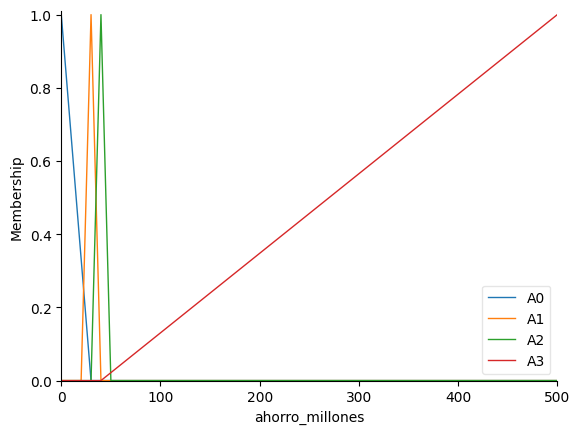

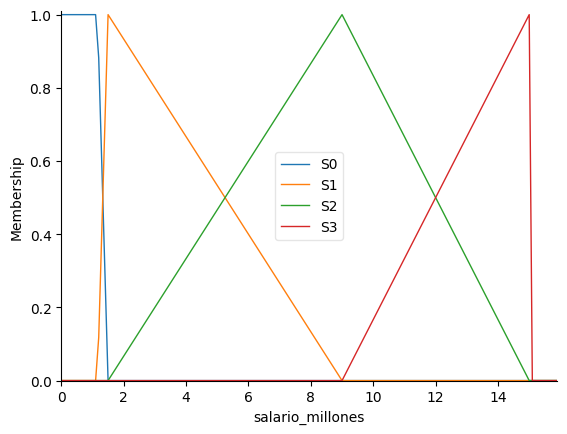

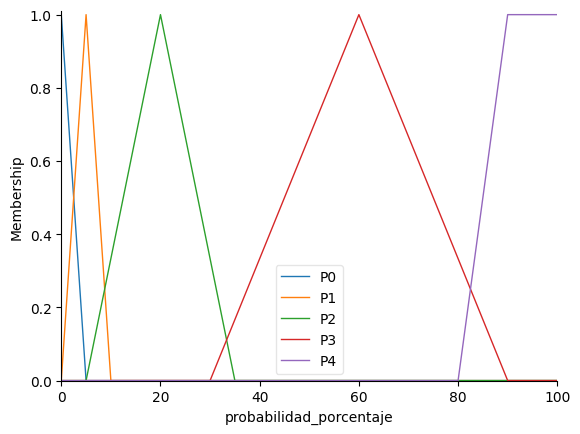

In [6]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
rango_desde_ahorro_millones=0; rango_hasta_ahorro_millones=501 #es 10+1 por programación.
#VARIABLES ENTRADA:
ahorro_millones = ctrl.Antecedent(np.arange(rango_desde_ahorro_millones,rango_hasta_ahorro_millones,1),'ahorro_millones') #Antecedent significa que es una variable de entrada.
salario_millones= ctrl.Antecedent(np.arange(0,16,0.1),'salario_millones')
#VARIABLES SALIDA:
probabilidad_porcentaje=ctrl.Consequent(np.arange(0,101,1),'probabilidad_porcentaje')
##Funciones de membresía:
#ahorros
ahorro_millones['A0']=fuzz.trimf(ahorro_millones.universe,[0,0,30]) #Define como triangulos con puntos [a,b,c]. Se puede trapecio trapmf[a,b,c,d]
ahorro_millones['A1']=fuzz.trimf(ahorro_millones.universe,[20,30,40])
ahorro_millones['A2']=fuzz.trimf(ahorro_millones.universe,[30,40,50])
ahorro_millones['A3']=fuzz.trimf(ahorro_millones.universe,[40,500,500])
ahorro_millones.view() #Grafica

#salarios
salario_millones['S0']=fuzz.trapmf(salario_millones.universe,[0,0,1.16,1.5])
salario_millones['S1']=fuzz.trimf(salario_millones.universe,[1.16,1.5,9])
salario_millones['S2']=fuzz.trimf(salario_millones.universe,[1.5,9,15]) #1.5,9,15
salario_millones['S3']=fuzz.trimf(salario_millones.universe,[9,15,15])
salario_millones.view()

#probabilidad_porcentaje
probabilidad_porcentaje['P0']=fuzz.trimf(probabilidad_porcentaje.universe,[0,0,5])# triángulo o trapecio, trapmf[a,b,c,d]
probabilidad_porcentaje['P1']=fuzz.trimf(probabilidad_porcentaje.universe,[0,5,10])
probabilidad_porcentaje['P2']=fuzz.trimf(probabilidad_porcentaje.universe,[5,20,35])#5,20,60
probabilidad_porcentaje['P3']=fuzz.trimf(probabilidad_porcentaje.universe,[30,60,90])#20,60,90
probabilidad_porcentaje['P4']=fuzz.trapmf(probabilidad_porcentaje.universe,[80,90,100,100]) #60,90,100,100
probabilidad_porcentaje.view()

##Defino reglas difusas Tabla:
regla11 = ctrl.Rule(ahorro_millones['A0'] & salario_millones['S0'],probabilidad_porcentaje['P0'])
regla12 = ctrl.Rule(ahorro_millones['A1'] & salario_millones['S0'],probabilidad_porcentaje['P1'])
regla13 = ctrl.Rule(ahorro_millones['A2'] & salario_millones['S0'],probabilidad_porcentaje['P2'])
regla14 = ctrl.Rule(ahorro_millones['A3'] & salario_millones['S0'],probabilidad_porcentaje['P3'])

regla21 = ctrl.Rule(ahorro_millones['A0'] & salario_millones['S1'],probabilidad_porcentaje['P1'])
regla22 = ctrl.Rule(ahorro_millones['A1'] & salario_millones['S1'],probabilidad_porcentaje['P1'])
regla23 = ctrl.Rule(ahorro_millones['A2'] & salario_millones['S1'],probabilidad_porcentaje['P2'])
regla24 = ctrl.Rule(ahorro_millones['A3'] & salario_millones['S1'],probabilidad_porcentaje['P3'])

regla31 = ctrl.Rule(ahorro_millones['A0'] & salario_millones['S2'],probabilidad_porcentaje['P2'])
regla32 = ctrl.Rule(ahorro_millones['A1'] & salario_millones['S2'],probabilidad_porcentaje['P3'])
regla33 = ctrl.Rule(ahorro_millones['A2'] & salario_millones['S2'],probabilidad_porcentaje['P3'])
regla34 = ctrl.Rule(ahorro_millones['A3'] & salario_millones['S2'],probabilidad_porcentaje['P4'])

regla41 = ctrl.Rule(ahorro_millones['A0'] & salario_millones['S3'],probabilidad_porcentaje['P2'])
regla42 = ctrl.Rule(ahorro_millones['A1'] & salario_millones['S3'],probabilidad_porcentaje['P3'])
regla43 = ctrl.Rule(ahorro_millones['A2'] & salario_millones['S3'],probabilidad_porcentaje['P4'])
regla44 = ctrl.Rule(ahorro_millones['A3'] & salario_millones['S3'],probabilidad_porcentaje['P4'])

## Creo sistema control:
sistema_control = ctrl.ControlSystem([regla11,regla12,regla13,regla14,
                                      regla21,regla22,regla23,regla24,
                                      regla31,regla32,regla33,regla34,
                                      regla41,regla42,regla43,regla44])
controlador = ctrl.ControlSystemSimulation(sistema_control) #Simula el sistema.

Puesta a prueba de requisitos:

In [7]:
## Uso del controlador reemplazando por valores:
valorA=500 #ahorros
valorB=15 #salario
controlador.input['ahorro_millones']=valorA #Asigno valores
controlador.input['salario_millones']=valorB #Asigno valores
controlador.compute()
resultado_aperturaPorcentaje = controlador.output['probabilidad_porcentaje'] #Almacena salida resultante
print(f"Para un ahorro de {valorA} millones y salario de {valorB} millones, la probabilidad de ser cliente preferencial es de:{resultado_aperturaPorcentaje} %") #Muestra salda resultante

valorA_2=30
valorB_2=9
controlador.input['ahorro_millones']=valorA_2 #Asigno valores
controlador.input['salario_millones']=valorB_2 #Asigno valores
controlador.compute()
resultado_aperturaPorcentaje = controlador.output['probabilidad_porcentaje'] #Almacena salida resultante
print(f"Para un ahorro de {valorA_2} millones y salario de {valorB_2} millones, la probabilidad de ser cliente preferencial es de:{resultado_aperturaPorcentaje} %") #Muestra salda resultante

valorA_3=40
valorB_3=1.16
controlador.input['ahorro_millones']=valorA_3 #Asigno valores
controlador.input['salario_millones']=valorB_3 #Asigno valores
controlador.compute()
resultado_aperturaPorcentaje = controlador.output['probabilidad_porcentaje'] #Almacena salida resultante
print(f"Para un ahorro de {valorA_3} millones y salario de {valorB_3} millones, la probabilidad de ser cliente preferencial es de:{resultado_aperturaPorcentaje} %") #Muestra salda resultante

valorA_4=0
valorB_4=1.5
controlador.input['ahorro_millones']=valorA_4 #Asigno valores
controlador.input['salario_millones']=valorB_4 #Asigno valores
controlador.compute()
resultado_aperturaPorcentaje = controlador.output['probabilidad_porcentaje'] #Almacena salida resultante
print(f"Para un ahorro de {valorA_4} millones y salario de {valorB_4} millones, la probabilidad de ser cliente preferencial es de:{resultado_aperturaPorcentaje} %") #Muestra salda resultante


Para un ahorro de 500 millones y salario de 15 millones, la probabilidad de ser cliente preferencial es de:92.22222222222223 %
Para un ahorro de 30 millones y salario de 9 millones, la probabilidad de ser cliente preferencial es de:60.00000000000001 %
Para un ahorro de 40 millones y salario de 1.16 millones, la probabilidad de ser cliente preferencial es de:20.000000000000004 %
Para un ahorro de 0 millones y salario de 1.5 millones, la probabilidad de ser cliente preferencial es de:5.000000000000001 %
